In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
test_data_path = 'data/test.csv'
train_data_path = 'data/train.csv'

In [4]:
raw_train_data = pd.read_csv(train_data_path)
raw_train_data.head(10)

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v556,v557,v558,v559,v560,v561,v562,v563,v564,label
0,0,0,f,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,...,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,A,0.288585,-0.913526,-0.020294,2
1,1,1,f,-0.123520,-0.998245,-0.975300,0,-0.998807,-0.974914,-0.957686,...,-0.732626,0.703511,-0.844788,0.180289,-0.054317,A,0.278419,-0.960322,-0.016411,2
2,2,2,f,-0.113462,-0.995380,-0.967187,0,-0.996520,-0.963668,-0.977469,...,0.100699,0.808529,-0.848933,0.180637,-0.049118,A,0.279653,-0.978944,-0.019467,2
3,3,3,f,-0.123283,-0.996091,-0.983403,0,-0.997099,-0.982750,-0.989302,...,0.640011,-0.485366,-0.848649,0.181935,-0.047663,A,0.279174,-0.990675,-0.026201,2
4,4,4,f,-0.115362,-0.998139,-0.980817,0,-0.998321,-0.979672,-0.990441,...,0.693578,-0.615971,-0.847865,0.185151,-0.043892,A,0.276629,-0.990482,-0.016570,2
5,5,5,f,-0.105137,-0.997335,-0.990487,0,-0.997627,-0.990218,-0.995549,...,0.275041,-0.368224,-0.849632,0.184823,-0.042126,A,0.277199,-0.995420,-0.010098,2
6,6,6,f,-0.110022,-0.996921,-0.967186,0,-0.997003,-0.966097,-0.983116,...,0.014637,-0.189512,-0.852150,0.182170,-0.043010,A,0.279454,-0.983118,-0.019641,2
7,7,7,f,-0.125360,-0.996559,-0.966728,0,-0.996485,-0.966313,-0.982982,...,-0.561871,0.467383,-0.851017,0.183779,-0.041976,A,0.277432,-0.981585,-0.030488,2
8,8,8,f,-0.120751,-0.997328,-0.961245,0,-0.997596,-0.957236,-0.984379,...,-0.234313,0.117797,-0.847971,0.188982,-0.037364,A,0.277293,-0.983672,-0.021751,2
9,9,9,f,-0.106065,-0.994803,-0.972758,0,-0.995405,-0.973663,-0.985642,...,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,A,0.280586,-0.986244,-0.009960,2


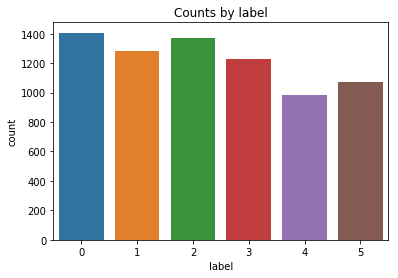

In [16]:
sbn.countplot(x='label', data=raw_train_data)
plt.title('Counts by label');